# Исследование о закономерностях, определяющих успешность компьютерных игр

В нашем распоряжении данные интернет-магазина "Стримчик", который продает по всему миру компьютерные игры. Доступны сведения о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года включительно. Представим, что сейчас декабрь 2016 года. Соответственно, данные за 2016 год неполные.
Необходимо выявить закономерности, определяющие успешность игры, чтобы сделать ставку на потенциально популярный продукт и сплариновать рекламные кампании на 2017 год. 




1. [Откроем файл с данными и изучим общую информацию](#start)
2. [Подготовим данные](#preprocessing)
    * [Заменим названия столбцов (приведем к нижнему регистру)](#names)
    * [Преобразуем данные в нужные типы](#type)
    * [Обработаем явные дубликаты и пропущенные значения в столбцах](#skip)
    * [Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец](#sales)
3. [Проведём исследовательский анализ данных](#analys)
    * [Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды](#total)
    * [Посмотрим, как менялись продажи по платформам](#sales_platforms)
    * [Возьмем данные за актуальный период, чтобы построить прогноз на 2017 год](#actual)
    * [Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам](#boxplot)
    * [Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#reviews)
    * [Посмотрим на общее распределение игр по жанрам](#genres)
4. [Составим портрет пользователя каждого региона](#user)
    * [Определим самые популярные платформы (топ-5)](#popular_platforms)
    * [Определим самые популярные жанры (топ-5)](#popular_genres)
    * [Определим влияние рейтинга ESRB на продажи](#esrb)
5. [Проверим гипотезы](#hypothesis)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#h_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#h_2)
6. [Общий вывод](#conclusion)    

<a id="preprocessing">
    
## Откроем файл с данными и изучим общую информацию </a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
import plotly.express as px

try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

При запуске метода 'info()' была обнаружена проблема. Все данные склеились в одну строку. Разбили их по колонкам параметром 'sep'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


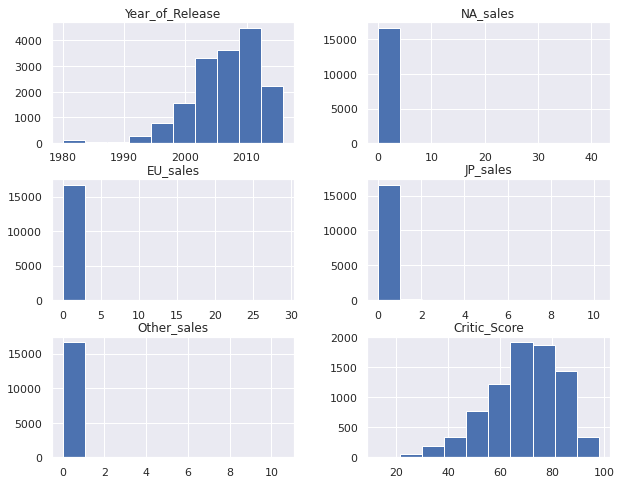

In [ ]:
df.hist(figsize=(10, 8));

На ряде гистограмм наблюдается концентрация значений в левой части и жирные хвосты в правой части таблиц. Возможно, требуется очистка от выбросов. Также в некоторых  столбцах с числами неверно указан тип, из-за чего невозможно на этапе ознакомления с данными построить гистограмму.

<a id="preprocessing">
    
## Подготовим данные </a>


<a id="names">

**Заменим названия столбцов (приведем к нижнему регистру)**
</a>

In [ ]:
df.columns = df.columns.str.lower()

<a id="type">

**Преобразуем данные в нужные типы**
</a>

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

Данные в столбце "Год выпуска" заменили на тип 'int' для более удобного  дальнейшего исследования. Сведения в столбце "Оценка пользователей" преобразовали в тип 'float'. Из-за наличия аббревиатуры 'tbd' ("требует определения", то есть оценка не выставлена) использовали для столбца метод 'to_numeric'. Возможно, ошибки в типах данных возникли при выгрузке. 

<a id="skip">

**Обработаем явные дубликаты и пропущенные значения в столбцах**
</a>

In [ ]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [ ]:
df = df.query('index != 16230').copy()

In [ ]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016094
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513222
user_score         0.545950
rating             0.404810
dtype: float64

In [ ]:
df['rating'] = df['rating'].fillna('unknown')


Пропуски в столбце "Год выпска" оставим без изменений. Их всего два процента, а заполнение может привести к искажению данных, поскольку речь о конкретных релизах игр.

Заполнять оценки пользователей и критиков какими-либо значениями считаем нецелесообразным. Данные столбцы содержат уникальные реакции пользователей, у каждой игры свои особенности по составу и качеству исполнения даже в рамках одного жарна и разработчика.

Пропуски в рейтинге ESRB заполним значением 'unknown'. Пропусков в данном столбце много, 40%. Возможно, исследование незаполненных ячеек даст интересную информацию. 

<a id="sales">

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**
</a>

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<a id="analys">
    
## Проведём исследовательский анализ данных </a>

<a id="total">

**Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды**
</a>

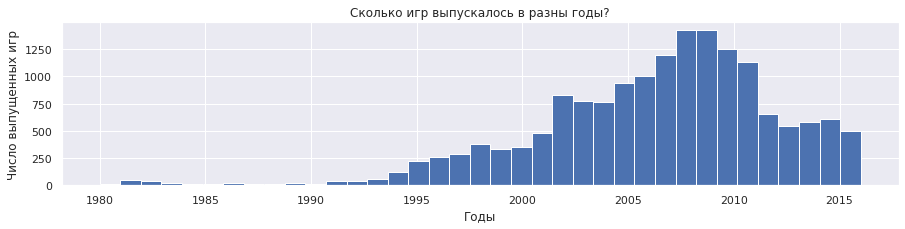

In [ ]:
df['year_of_release'].plot(kind='hist', bins=37, grid=True, figsize=(15, 3))
plt.title('Сколько игр выпускалось в разны годы?')
plt.xlabel('Годы')
plt.ylabel('Число выпущенных игр');

Судя по графику, в 1980-е выходило не больше нескольких десятков игр каждый год, причем количество премьер было одинаковым год от года. Начиная с 1990-го года наблюдается едегожный рост новых релизов. В начале 2000-х - почти двукратный рост выхода новых игр, который достигает пика в 2008-2009 годах (более 1400 новых игр в каждом из двух годов). В 2012-м году - двукратное падение премьер. Ситуация замирает до 2016-го года включительно.   

<a id="sales_platforms">

**Посмотрим, как менялись продажи по платформам**
</a>

Выберем 10 платформ с наибольшими суммарными продажами. 

Но вначале рассмотрим столбец с суммарными продажами подробнее.

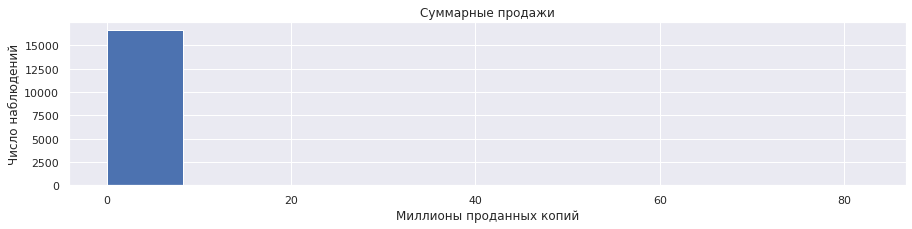

In [ ]:
df['total_sales'].plot(kind='hist', grid=True, figsize=(15, 3))
plt.title('Суммарные продажи')
plt.xlabel('Миллионы проданных копий')
plt.ylabel('Число наблюдений');

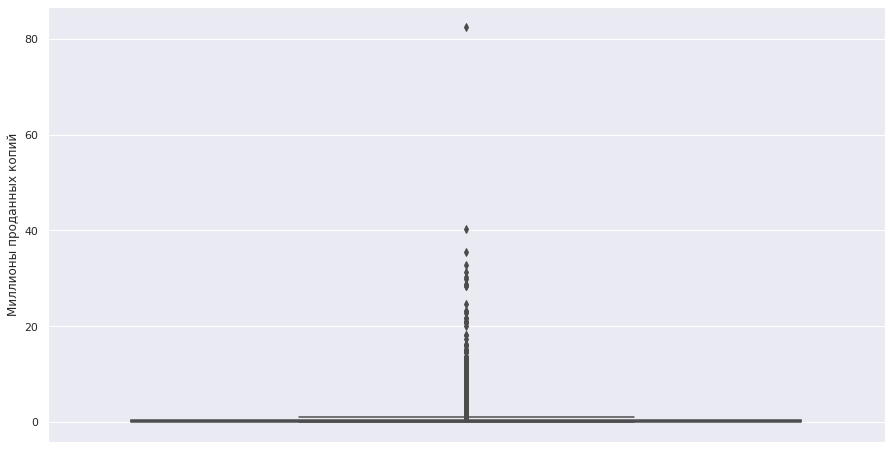

In [ ]:
sns.boxplot(y='total_sales', data=df)
plt.ylabel('Миллионы проданных копий');

In [ ]:
df['total_sales'].describe()

count    16714.000000
mean         0.533427
std          1.548302
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Наблюдается жирный хвост, который может сильно исказить результаты исследования. Среднее значение выше медианы и даже третьего квартиля."Ящик с усами" при таких значениях вообще не просматривается. Однако такая картина может быть особбенностью рынка видеоигр. Оставим данные без изменений.

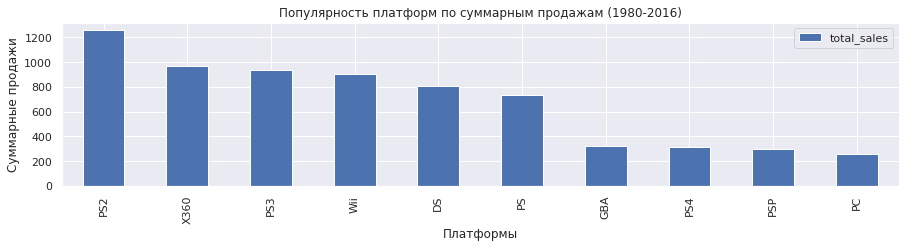

In [ ]:
top_platforms = df\
              .pivot_table(index='platform', values='total_sales', aggfunc=sum)\
              .sort_values(by=['total_sales'], ascending=False)\
              .head(10)

top_platforms.plot(kind='bar', figsize=(15, 3))
plt.title('Популярность платформ по суммарным продажам (1980-2016)')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

Лидер суммарных продаж - платформа PS2 (600 тысяч проданных копий). У платформ, занявших 2-6 места в топ-10, - около 400 тысяч проданных копий, это число постепенно снижается. 7-10 места - порядка 250 тысяч проданных копий.

Посмотрим на распределение по годам.

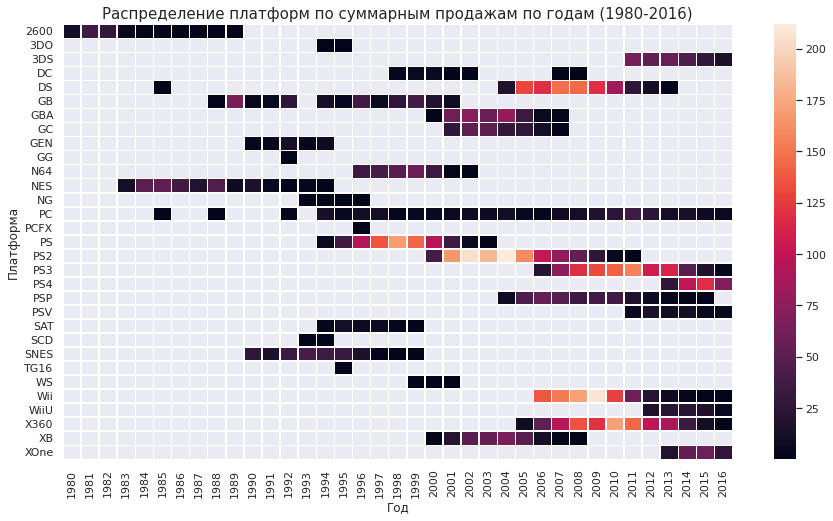

In [ ]:
platform_year_sales = df.pivot_table(
                     index=['platform'],  
                     columns='year_of_release', 
                     values='total_sales', 
                     aggfunc=sum).applymap(float)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(platform_year_sales, linewidths=.5)
plt.title('Распределение платформ по суммарным продажам по годам (1980-2016)', fontsize = 15)
plt.xlabel('Год')
plt.ylabel('Платформа');

Средний срок жизни платформы - 5-8 лет. Практически все платформы-лидеры не "выстреливали" сразу, требовалось 1-2 года, чтобы пользователи распробовали новинку. Исключение составляет платформа PC. На фоне средних суммарных продаж для топ-10 платформ, данная платформа демонстрирует завидную живучесть и присутствует на рынке более 12 лет.

<a id="actual">

**Возьмем данные за актуальный период, чтобы построить прогноз на 2017 год**
</a>

Актуальным будем считать период последних трех лет. Этот период соответствует тенденции по количеству премьер после премьерного бума 2008-2009 годов. В него входят платформы и игры, которые и сейчас (декабрь 2016 года) на рынке, и по которым можно строить прогноз на год 2017-й. 

In [ ]:
df_2014_16 = df[df['year_of_release'].isin([2014, 2015, 2016])].copy()
df_2014_16.shape

(1689, 12)

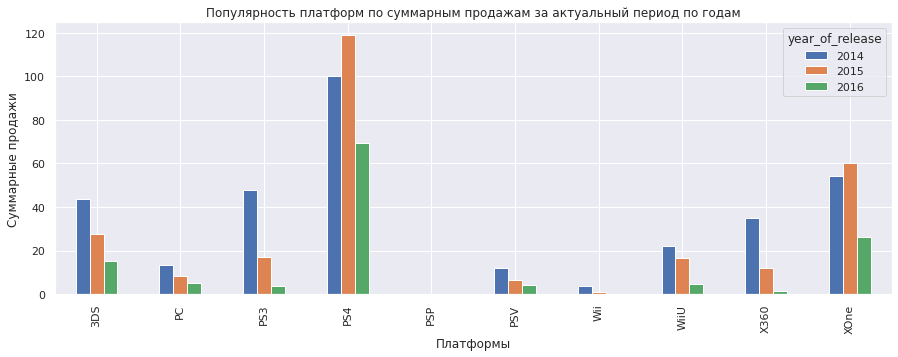

In [ ]:
df_2014_16\
  .pivot_table(index=['platform'], columns='year_of_release', values='total_sales', aggfunc=sum)\
  .plot(kind='bar', figsize=(15, 5))

plt.title('Популярность платформ по суммарным продажам за актуальный период по годам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');  

Продажи игр на всех платформах падают с каждым годом. Лидеры - PS4 (Sony Electronics), XOne (Microsoft) - новички-конкуренты. Обе вышли в 2014-м, и к 2015-му продажи игр для них выросли. Но в 2016-м продажи упали. У XOne более чем вдвое, у PS4 на 45%. Таким образом, и по совокупным продажам, и по снижающейся динамике продаж выглядит наиболее перспективной платформой. 

В аутсайдерах портативные платформы Wii и PSP, для которой в 2016 году вовсе нет новинок. Поддержка этих платформ прекращена в 2013 и 2014 году, соответственно. 

<a id="boxplot">

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**
</a>

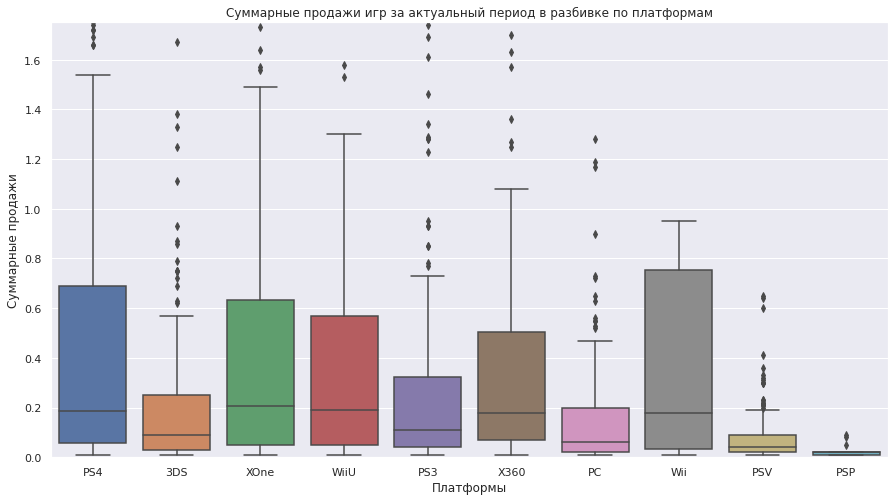

In [ ]:
sns.boxplot(data = df_2014_16, x = 'platform' , y = 'total_sales')
plt.ylim(0, 1.75)
plt.title('Суммарные продажи игр за актуальный период в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

У всех платформ правое от медианного значения плечо гораздо дальше левого. У платформы XOne медианное значение чуть выше, чем у конкурента, платфоры PS4, зато у PS4 третий квартиль и правый ус длиннее, что говорит о перспективах вложения в рекламу для этой площадки. Если продвигать дорогие позици в рекламе, можно привлечь новых клиентов, заказывающих на бОльшие суммы. Предшественник XOne, платформа X360, также имеет перспективные показатели третьего квартиля и правого уса.

Отметим портативную платформу WiiU. По размаху правого уса она также имеет перспективы привлечения "дорогих" клиентов через рекламу. По уровню правого уса платформа занимает третье место, а ее медиана даже выше, чем у лидера - PS4.

<a id="reviews">

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**
</a>

Возьмем платформу XOne.

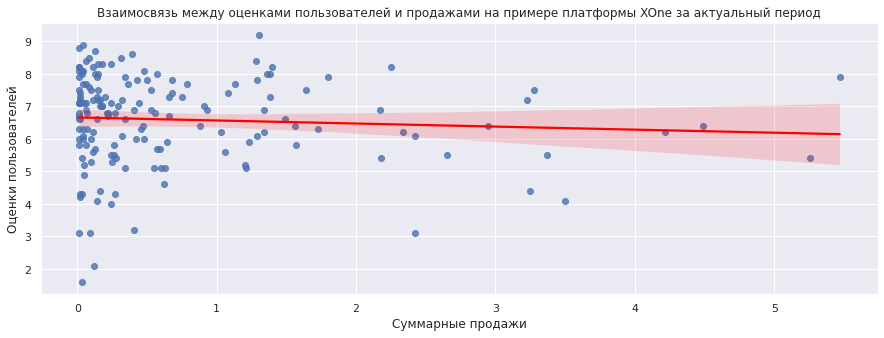

Коэффициент корреляции:  -0.0703839280647581


In [ ]:
df_2014_16_xone = df_2014_16[df_2014_16['platform'].isin(['XOne'])]

plt.figure(figsize = (15,5))
sns.regplot(x = 'total_sales', y = 'user_score', data = df_2014_16_xone, line_kws={'color':'red'})
plt.title('Взаимосвязь между оценками пользователей и продажами на примере платформы XOne за актуальный период')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки пользователей')
plt.show()
print('Коэффициент корреляции: ', df_2014_16_xone['user_score'].corr(df_2014_16_xone['total_sales']))

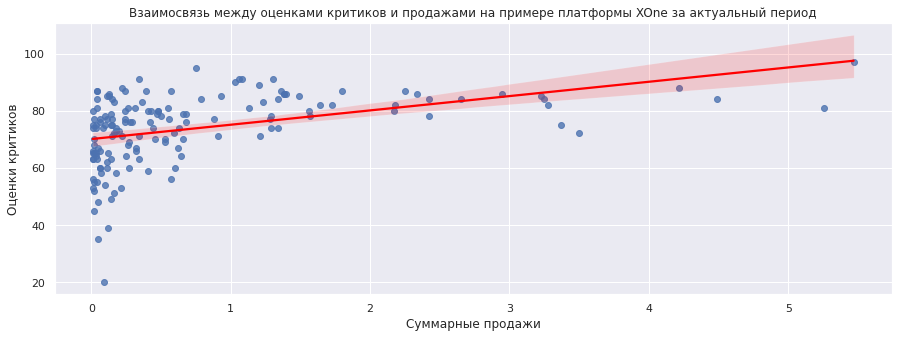

Коэффициент корреляции:  0.42867694370333226


In [ ]:
plt.figure(figsize = (15,5))
sns.regplot(x = 'total_sales', y = 'critic_score', data = df_2014_16_xone, line_kws={'color':'red'})
plt.title('Взаимосвязь между оценками критиков и продажами на примере платформы XOne за актуальный период')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки критиков')
plt.show()
print('Коэффициент корреляции: ', df_2014_16_xone['critic_score'].corr(df_2014_16_xone['total_sales']))

Оценки пользователей никак не влияют на продажи игр для платформы XOne.
Корреляция оценок критиков и продаж очень слабая.

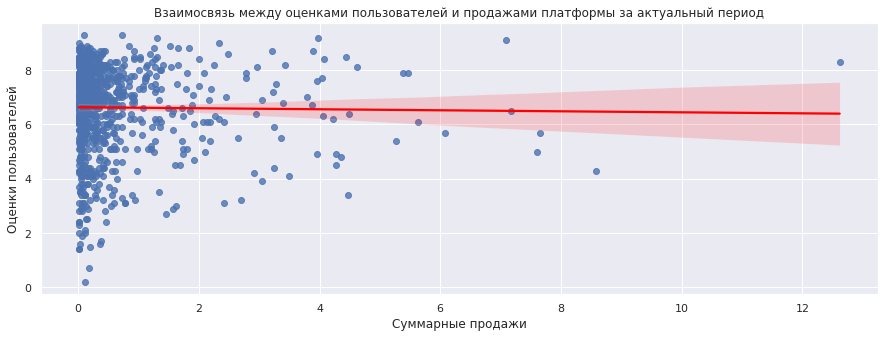

Коэффициент корреляции:  -0.013070305002484562


In [ ]:
plt.figure(figsize = (15,5))
sns.regplot(x = 'total_sales', y = 'user_score', data = df_2014_16, line_kws={'color':'red'})
plt.title('Взаимосвязь между оценками пользователей и продажами платформы за актуальный период')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки пользователей')
plt.show()
print('Коэффициент корреляции: ', df_2014_16['user_score'].corr(df_2014_16['total_sales']))

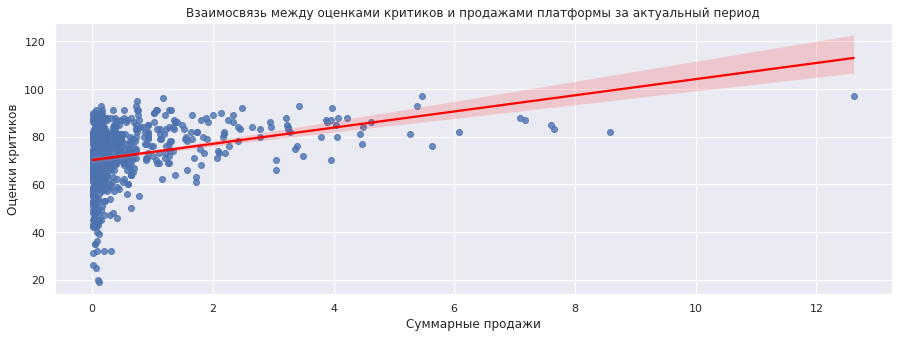

Коэффициент корреляции:  0.328105086966363


In [ ]:
plt.figure(figsize = (15,5))
sns.regplot(x = 'total_sales', y = 'critic_score', data = df_2014_16, line_kws={'color':'red'})
plt.title('Взаимосвязь между оценками критиков и продажами платформы за актуальный период')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценки критиков')
plt.show()
print('Коэффициент корреляции: ', df_2014_16['critic_score'].corr(df_2014_16['total_sales']))

Корреляция у других платформ такая же. Оценки пользователей не влияют на продажи, между оценками критиков и продажами очень слабая корреляция. Отметим, что в столбцах с оценками критиков и пользователей около 50% пропусков. Данных может быть недостаточно.

<a id="genres">

**Посмотрим на общее распределение игр по жанрам**
</a>

Определим количество игр в каждом жанре. 

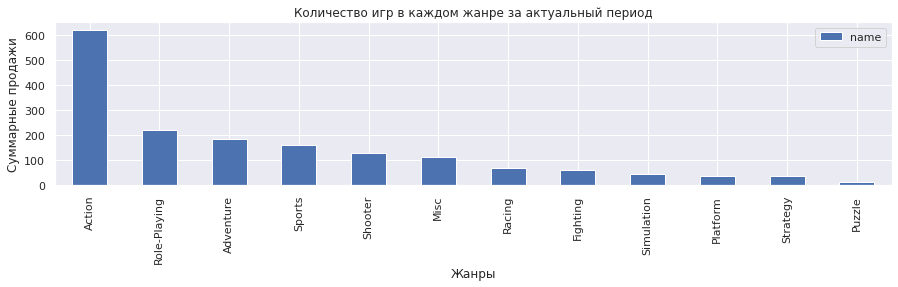

In [ ]:
top_genre = df_2014_16\
              .pivot_table(index='genre', values='name', aggfunc='count')\
              .sort_values(by=['name'], ascending=False)
            
top_genre.plot(kind='bar', figsize=(15, 3))
plt.title('Количество игр в каждом жанре за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

Количество игр сильно различается, поэтому для подсчета продаж игр по жанрам будем использовать медианные значения.

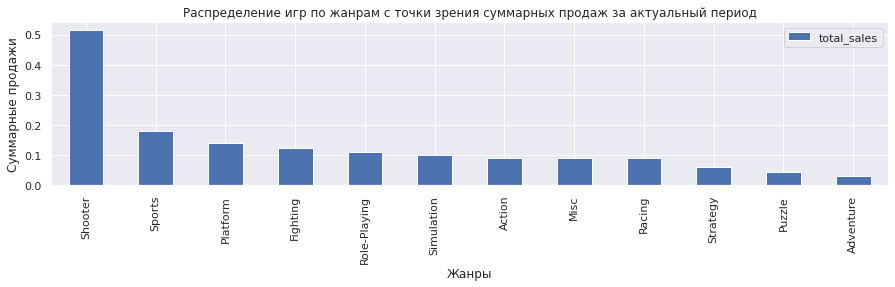

In [ ]:
top_genre = df_2014_16\
              .pivot_table(index='genre', values='total_sales', aggfunc='median')\
              .sort_values(by=['total_sales'], ascending=False)\
             

top_genre.plot(kind='bar', figsize=(15, 3))
plt.title('Распределение игр по жанрам с точки зрения суммарных продаж за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

Судя по медианным значениям, шутеры в безусловных лидерах. Идущие за ними спортивные игры отстают втрое. Далее список жанров по суммарным продажам отличается незначительно.

Замыкают список приключенческие игры. Паззлы, идущие перед ними, тоже не в моде у пользователей.

<a id="user">
    
## Составим портрет пользователя каждого региона </a>

<a id="popular_platforms">

**Определим самые популярные платформы (топ-5)**
</a>

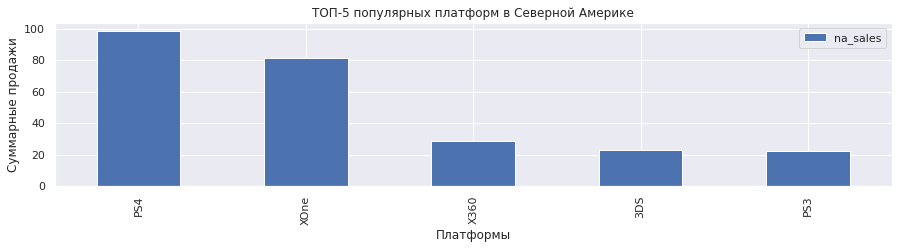

In [ ]:
top_platforms_na = df_2014_16.pivot_table(index='platform', values='na_sales', aggfunc=sum)\
                   .sort_values(by=['na_sales'], ascending=False).head(5)

top_platforms_na.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных платформ в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

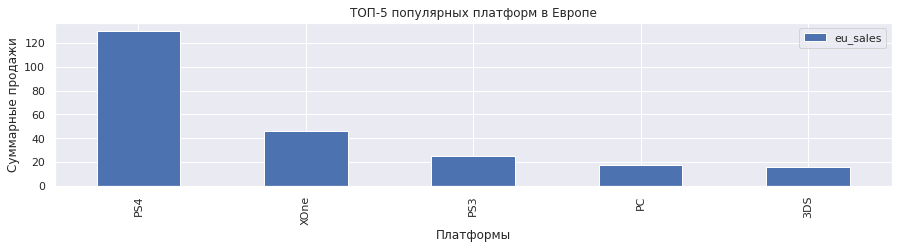

In [ ]:
top_platforms_eu = df_2014_16.pivot_table(index='platform', values='eu_sales', aggfunc=sum)\
                   .sort_values(by=['eu_sales'], ascending=False).head(5)

top_platforms_eu.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных платформ в Европе')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

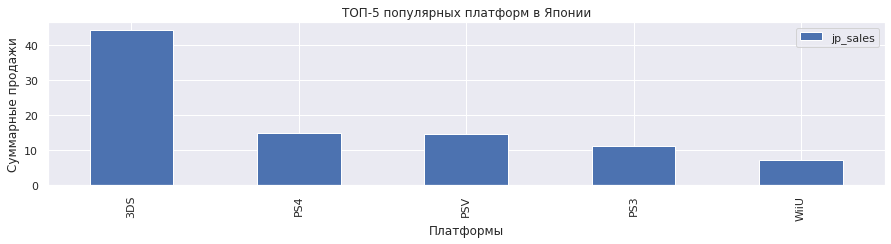

In [ ]:
top_platforms_jp = df_2014_16.pivot_table(index='platform', values='jp_sales', aggfunc=sum)\
                   .sort_values(by=['jp_sales'], ascending=False).head(5)

top_platforms_jp.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных платформ в Японии')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

Европа играет больше Северной Америки. Япония на третьем месте. 
Безусловный лидер в европе - японская платформа PS4. В Северной Америке она тоже на первом месте, но там отставание американской XOne, идущей следом, не столь значительно. В Японии самая популярная платформа 3DS. PS4, которая вторая, отстает втрое.
3DS, в отличие от лидеров в Северной Америке и Европе, портативная платформа. Может создавать 3D-эффект изображения без использования очков за счет специального экрана. PSV, которая в Японии на третьем месте, также игровая консоль карманного типа.

<a id="popular_genres">

**Определим самые популярные жанры (топ-5)**
</a>

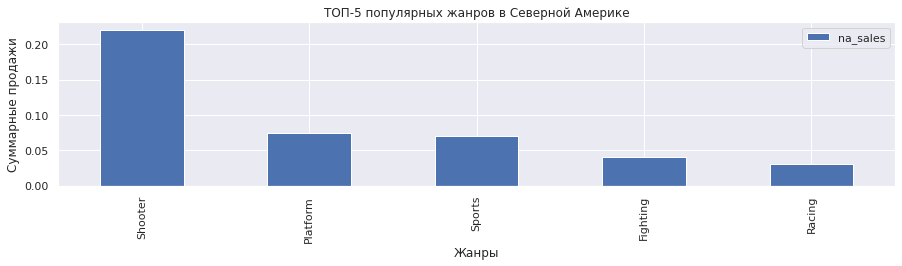

In [ ]:
top_genres_na = df_2014_16.pivot_table(index='genre', values='na_sales', aggfunc='median')\
                   .sort_values(by=['na_sales'], ascending=False).head(5)

top_genres_na.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных жанров в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

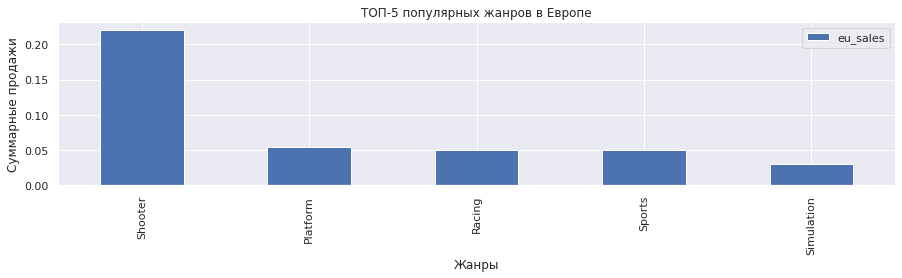

In [ ]:
top_genres_eu = df_2014_16.pivot_table(index='genre', values='eu_sales', aggfunc='median')\
                   .sort_values(by=['eu_sales'], ascending=False).head(5)

top_genres_eu.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных жанров в Европе')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

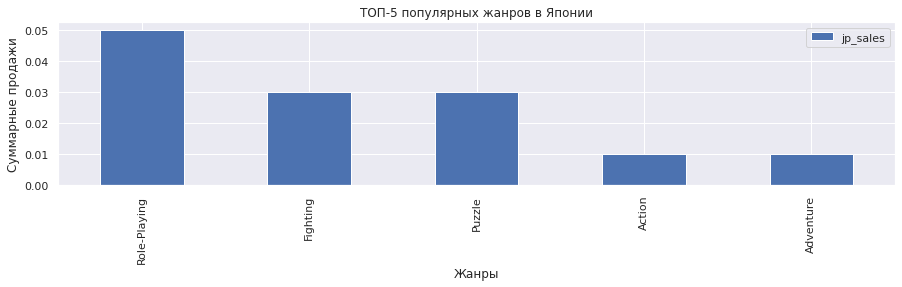

In [ ]:
top_genres_jp = df_2014_16.pivot_table(index='genre', values='jp_sales', aggfunc='median')\
                   .sort_values(by=['jp_sales'], ascending=False).head(5)

top_genres_jp.plot(kind='bar', figsize=(15, 3))
plt.title('ТОП-5 популярных жанров в Японии')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

Продажи считаем по медиане, поскольку ранее выяснили, что количество игр в жанрах сильно отличается.

Шутеры в Северной Америке и Европе - безусловные лидеры. На втором месте в обоих регионах бродилки, сильно отстающие от лидера. 
В Японии на первом месте ролевые игры, которые популярны в этой стране еще с 1980-х годов.  Второе место делят драки и - самое неожиданное - паззлы. Шутеров в японском ТОП-5 нет и в помине.

<a id="esrb">

**Определим влияние рейтинга ESRB на продажи**
</a>

In [ ]:
rating_esrb = df_2014_16.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().copy()
rating_esrb

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,50.74,58.06,8.94,15.39
E10+,33.23,26.16,4.46,7.83
M,96.42,93.44,8.01,28.67
T,38.95,34.07,14.78,11.33
unknown,64.72,58.95,56.90,18.40


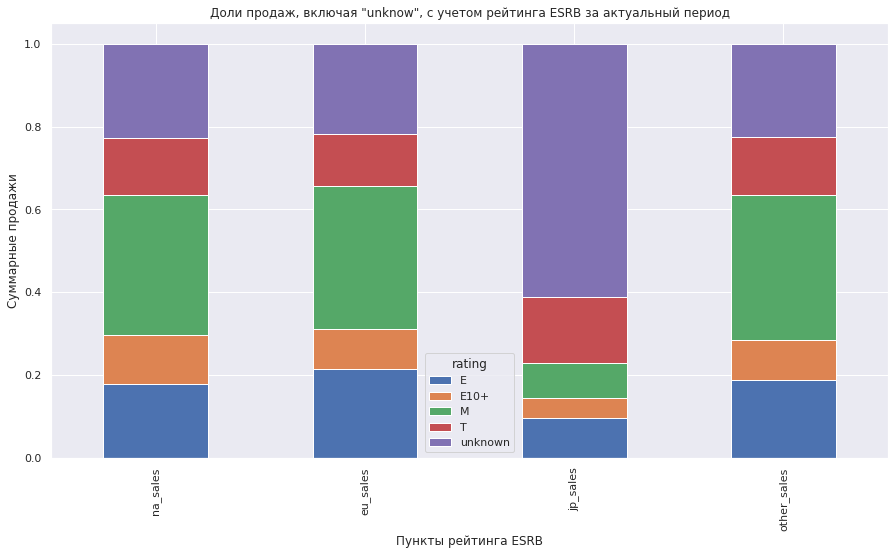

In [ ]:
(rating_esrb / rating_esrb.sum()).T.plot.bar(stacked=True)
plt.title('Доли продаж, включая "unknow", с учетом рейтинга ESRB за актуальный период')
plt.xlabel('Пункты рейтинга ESRB')
plt.ylabel('Суммарные продажи');

Популярнее всего в Северной Америке и Европе игры для взрослых (M). Они на 40% опережают категорию, идущую второй. Серебро у игр без возрастных ограничений (Е). За ними идут игры для подростков (Т) и игры для детей старше 10 лет (Е10+). 

В Японии лидирую игры для подростков (Т). Игры для взрослых (M) интересуют японских пользователей наравне с играми без возрастных ограничений (Е).

"Темная лошадка" - значения 'unknown'. Доля продаж по регионам со значением "unknown" сильно отличается. Если для Северной Америки и Европы доля игр без рейтинга составляет около 20%, то для Японии - 60% (!). Можно сделать вывод, что рейтинг ESRB плохо подходит для анализа рынка Японии.

И действительно, ESRB - это рейтинг для Северной Америки, в Европе используют PEGI, а в Японии - CERO.

<a id="hypothesis">
    
## Проверим гипотезы </a>

<a id="h_1">

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
</a>

В столбце с оценками пользователей есть пустые ячейки. Учтем это и будем использовать дополнительный параметр в тесте. Есть сомнения, что выборки одинакового размера, поэтому применим также параметр equal_var=False. 

`H_0: Пользовательские рейтинги платформы Xbox = пользовательским рейтингам платформы PC`

`H_a: Пользовательские рейтинги платформы Xbox ≠ пользовательским рейтингам платформы PC`

`alpha = 0.05`

In [ ]:
xbox = df_2014_16[df_2014_16['platform'] =='XOne']
pc = df_2014_16[df_2014_16['platform'] =='PC']

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False, nan_policy='omit')

alpha = 0.05 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668985
Не получилось отвергнуть нулевую гипотезу


<a id="h_2">

**Средние пользовательские рейтинги жанров Action и Sports разные**
</a>

`H_0: Пользовательские рейтинги жанра Action = пользовательским рейтингам жанра Sports`

`H_a: Пользовательские рейтинги жанра Action ≠ пользовательским рейтингам жанра Sports`

`alpha = 0.05`

In [ ]:
action = df_2014_16[df_2014_16['genre'] =='Action']
sports = df_2014_16[df_2014_16['genre'] =='Sports']

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy='omit')

alpha = 0.05 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644845e-14
Отвергаем нулевую гипотезу


Проведенное исследование показывает:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

В качестве нулевой гипотезы брали консервативную версию, что рейтинги равны.

alpha установили на уровне 0,05 - это общепринятые пороговые значения.



<a id="conclusion">
    
## Общий вывод </a>  

1. Европа играет больше Северной Америки. Япония на третьем месте. 
2. Лидер в Северной Америке - японская платформа PS4 от Sony Electronics. На втором месте американская платформа-конкурент XOne. В Японии в лидерах местная портативная платформа 3DS. PS4 на втором месте, при этом она отстает от карманного лидера втрое.
3. Срок жизни платформы - 5-8 лет. С этой точки зрения XOne и PS4 выглядят перспективными. Они в середине жизненного цикла.
4. Отметим платформу PC, входящую в ТОП-5 в Европе. На фоне небольших суммарных продаж, данная платформа демонстрирует завидную живучесть и присутствует на рынке более 12 лет. 
5. Платформа PS4 выглядит немного перспективнее своего конкурента XOne с точки зрения привлечения новых пользователей с помощью рекламы, причем пользователей, заказывающих на бОльшие суммы.
6. У портативной платформы WiiU (входит в ТОП-5 в Японии) также высокий рекламный потенциал. По длине правого уса и третего квартиля идет за PS4 и XOne.
7. Важно отметить, что с каждым годом падают продажи игр для всех платформ. Если смотреть на лидеров по регионам, у XOne в 2016-м продажи игр сократились на 50% в сравнении с годом предыдущим, у PS4 и 3DS на 40-45%.
8. Шутеры - безусловные лидеры в Северной Америке и Европе. Остальные жанры отстают чуть ли не в четыре раза. Япония - особая страна. Японские пользователи любят ролевые компьютерные игры (сказывается пристрастие к компьютерным ролевым играм на внутреннего рынка, сформированное еще в 1980-е), драки и паззлы. Спортивные игры и шутеры, популярные в Европе  и за океаном, в японский ТОП-5 не входят.
9. Хуже всего в мире продаются жанр-приключения, паззлы и стратегии.
10. Популярнее всего в Северной Америке и Европе игры для взрослых (рейтинг M классификации ESRB). Они на 40% опережают категорию, идущую второй (игры без возрастных ограничений (Е)). В Японии на первом месте игры для подростков (T). Отметим 40% пропусков в рейтингах игр. Данные могут быть неточными. Необходимо больше сведений.
11. Оценки польователей и критиков не влияют на продажи, судя по результатам исследования. Отметим, что в столбцах с оценками критиков и пользователей более 50% пропусков. Данных может быть недостаточно. Требуется методика повышения активности пользователей и критиков для сбора большего объема информации и повторного исследования.



Портрет идеального пользователя последних трех лет:

Северная Америка и Европа - платформа PS4, жанр "шутер", рейтинг M;

Япония - платфорпа 3DS, жанр ролевые компьютерные игры (сказывается традиция компьютерных ролевых игр для внутреннего рынка, заложенная еще в 1980-е), рейтинг T.

